In [224]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

import re

import time
import pickle

from functions import *

%load_ext autoreload
%autoreload 2

pd.set_option('max_colwidth', 150)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('data/poetry_foundation_clean.csv', index_col=0)
df.head()

,poet_url,genre,poem_url,poet,title,poem_lines,poem_string
0,https://www.poetryfoundation.org/poets/mary-ba...,augustan,https://www.poetryfoundation.org/poems/50523/a...,Mary Barber,Advice to Her Son on Marriage,"['When you gain her Affection, take care to pr...","When you gain her Affection, take care to pres..."
1,https://www.poetryfoundation.org/poets/susanna...,augustan,https://www.poetryfoundation.org/poems/50534/a...,Susanna Blamire,Auld Robin Forbes,"['And auld Robin Forbes hes gien tem a dance,\...","And auld Robin Forbes hes gien tem a dance,\r\..."
2,https://www.poetryfoundation.org/poets/susanna...,augustan,https://www.poetryfoundation.org/poems/50533/o...,Susanna Blamire,O Donald! Ye Are Just the Man,"['O Donald! ye are just the man\r', ' Who, wh...","O Donald! ye are just the man\r\n Who, when h..."
3,https://www.poetryfoundation.org/poets/susanna...,augustan,https://www.poetryfoundation.org/poems/50532/t...,Susanna Blamire,The Siller Croun,"['And ye shall walk in silk attire,\r', ' An...","And ye shall walk in silk attire,\r\n And si..."
4,https://www.poetryfoundation.org/poets/henry-c...,augustan,https://www.poetryfoundation.org/poems/43884/t...,Henry Carey,The Ballad of Sally in our Alley,"['Of all the Girls that are so smart\r', ' ...",Of all the Girls that are so smart\r\n The...


In [25]:
df.shape

(4839, 7)

##### Saving to CSV converts the poem_lines lists into a string, so we'll use our destringify function to convert it back to a list format.

In [3]:
df.loc[0,'poem_lines']

"['When you gain her Affection, take care to preserve it;\\r', 'Lest others persuade her, you do not deserve it.\\r', 'Still study to heighten the Joys of her Life;\\r', 'Not treat her the worse, for her being your Wife.\\r', 'If in Judgment she errs, set her right, without Pride:\\r', '’Tis the Province of insolent Fools, to deride.\\r', 'A Husband’s first Praise, is a ', 'Then change not these Titles, for ', 'Let your Person be neat, unaffectedly clean,\\r', 'Tho’ alone with your wife the whole Day you remain.\\r', 'Chuse Books, for her study, to fashion her Mind,\\r', 'To emulate those who excell’d of her Kind.\\r', 'Be Religion the principal Care of your Life,\\r', 'As you hope to be blest in your Children and Wife:\\r', 'So you, in your Marriage, shall gain its true End;\\r', 'And find, in your Wife, a ', '', '']"

In [4]:
df['poem_lines'] = df['poem_lines'].apply(destringify)
df.loc[0,'poem_lines']

['When you gain her Affection, take care to preserve it;\r',
 'Lest others persuade her, you do not deserve it.\r',
 'Still study to heighten the Joys of her Life;\r',
 'Not treat her the worse, for her being your Wife.\r',
 'If in Judgment she errs, set her right, without Pride:\r',
 '’Tis the Province of insolent Fools, to deride.\r',
 'A Husband’s first Praise, is a ',
 'Then change not these Titles, for ',
 'Let your Person be neat, unaffectedly clean,\r',
 'Tho’ alone with your wife the whole Day you remain.\r',
 'Chuse Books, for her study, to fashion her Mind,\r',
 'To emulate those who excell’d of her Kind.\r',
 'Be Religion the principal Care of your Life,\r',
 'As you hope to be blest in your Children and Wife:\r',
 'So you, in your Marriage, shall gain its true End;\r',
 'And find, in your Wife, a ',
 '',
 '']

##### We can already see that our webscraper wasn't perfect. We've lost some words, but do have the bulk of them.
##### Let's look at a breakdown of genres and see if there are any we should get rid of. My initial thoughts are to limit it in time period, so as to remove any language barriers so to speak (between, say, Shakespearean English and modern English).

In [6]:
df.genre.value_counts()

modern                            1136
victorian                          643
renaissance                        424
romantic                           397
imagist                            315
new_york_school                    239
black_mountain                     234
language_poetry                    191
new_york_school_2nd_generation     177
black_arts_movement                162
georgian                           158
confessional                       153
harlem_renaissance                 142
beat                               138
objectivist                        132
augustan                           114
fugitive                            74
middle_english                      10
Name: genre, dtype: int64

In [11]:
# check a sample Middle English poem
print(df[df.genre == 'middle_english'].iloc[0,-1])

Whan that Aprille with his shour
The droghte of March hath perc
And bath
Of which vertú engendr
Whan Zephirus eek with his swet
Inspir
The tendr
Hath in the Ram his half
And smal
That slepen al the nyght with open y
So priketh hem Natúre in hir corag
Thanne longen folk to goon on pilgrimag
And palmeres for to seken straung
To fern
And specially, from every shir
Of Eng
The hooly blisful martir for to sek
That hem hath holpen whan that they were seek

Bifil that in that seson on a day, 
In Southwerk at the Tabard as I lay, 
Redy to wenden on my pilgrymag
To Caunterbury with ful devout corag
At nyght were come into that hostelry
Wel nyne and twenty in a compaigny
Of sondry folk, by áventure y-fall
In felaweshipe, and pilgrimes were they all
That toward Caunterbury wolden ryd
The chambr
And wel we weren es
And shortly, whan the sonn
So hadde I spoken with hem everychon, 
That I was of hir felaweshipe anon, 
And mad
To take oure wey, ther as I yow devys

But nath
Er that I ferther in thi

##### Indeed, Middle English is definitely out.

In [26]:
df = df[df.genre != 'middle_english']
df.shape

(4829, 7)

In [29]:
# check a sample Renaissance poem
print(df[df.genre == 'renaissance'].iloc[0,-1])

Long have I long’d to see my love againe,
   Still have I wisht, but never could obtaine it;
   Rather than all the world (if I might gaine it)
Would I desire my love’s sweet precious gaine.
Yet in my soule I see him everie day,
   See him, and see his still sterne countenaunce,
   But (ah) what is of long continuance,
Where majestie and beautie beares the sway?
Sometimes, when I imagine that I see him,
   (As love is full of foolish fantasies)
   Weening to kisse his lips, as my love’s fees,
I feele but aire: nothing but aire to bee him.
   Thus with Ixion, kisse I clouds in vaine:
   Thus with Ixion, feele I endles paine.





In [15]:
# check a sample Augustan poem
print(df[df.genre == 'augustan'].iloc[1,-1])

And auld Robin Forbes hes gien tem a dance,
I pat on my speckets to see them aw prance;
I thout o’ the days when I was but fifteen,
And skipp’d wi’ the best upon Forbes’s green.
Of aw things that is I think thout is meast queer,
It brings that that’s by-past and sets it down here;
I see Willy as plain as I dui this bit leace,
When he tuik his cwoat lappet and deeghted his feace.

The lasses aw wonder’d what Willy cud see
In yen that was dark and hard featur’d leyke me;
And they wonder’d ay mair when they talk’d o’ my wit,
And slily telt Willy that cudn’t be it:
But Willy he laugh’d, and he meade me his weyfe,
And whea was mair happy thro’ aw his lang leyfe?
It’s e’en my great comfort, now Willy is geane,
The he offen said— nae place was leyke his awn heame!

I mind when I carried my wark to yon steyle
Where Willy was deykin, the time to beguile,
He wad fling me a daisy to put i’ my breast,
And I hammer’d my noddle to mek out a jest.
But merry or grave, Willy often wad tell
There was ni

##### According to Poetry Foundation's website, Renaissance and Augustan poems are from the years 1500 - 1780, and the differences in the English are fairly clear. For now, let's lose these.

In [201]:
df_trim = df[df.genre != 'renaissance']
df_trim = df_trim[df_trim.genre != 'augustan']
df_trim.shape

(4291, 7)

In [202]:
# check a sample Victorian poem
print(df[df.genre == 'victorian'].iloc[1,-1])

I
The evening comes, the fields are still. 
The tinkle of the thirsty rill, 
Unheard all day, ascends again; 
Deserted is the half-mown plain, 
Silent the swaths! the ringing wain, 
The mower's cry, the dog's alarms, 
All housed within the sleeping farms! 
The business of the day is done, 
The last-left haymaker is gone. 
And from the thyme upon the height, 
And from the elder-blossom white 
And pale dog-roses in the hedge, 
And from the mint-plant in the sedge, 
In puffs of balm the night-air blows 
The perfume which the day forgoes. 
And on the pure horizon far, 
See, pulsing with the first-born star, 
The liquid sky above the hill! 
The evening comes, the fields are still. 

       Loitering and leaping, 
       With saunter, with bounds— 
       Flickering and circling 
       In files and in rounds— 
       Gaily their pine-staff green 
       Tossing in air, 
       Loose o'er their shoulders white 
       Showering their hair— 
       See! the wild Maenads 
       Break from the

In [203]:
# check a sample Romantic poem
print(df[df.genre == 'romantic'].iloc[1,-1])

Now in thy dazzling half-oped eye, 
Thy curled nose and lip awry, 
Uphoisted arms and noddling head, 
And little chin with crystal spread, 
Poor helpless thing! what do I see, 
That I should sing of thee? 

From thy poor tongue no accents come, 
Which can but rub thy toothless gum: 
Small understanding boasts thy face, 
Thy shapeless limbs nor step nor grace: 
A few short words thy feats may tell, 
And yet I love thee well. 

When wakes the sudden bitter shriek, 
And redder swells thy little cheek 
When rattled keys thy woes beguile, 
And through thine eyelids gleams the smile, 
Still for thy weakly self is spent 
Thy little silly plaint. 

But when thy friends are in distress. 
Thou’lt laugh and chuckle n’ertheless, 
Nor with kind sympathy be smitten, 
Though all are sad but thee and kitten; 
Yet puny varlet that thou art, 
Thou twitchest at the heart. 

Thy smooth round cheek so soft and warm; 
Thy pinky hand and dimpled arm; 
Thy silken locks that scantly peep, 
With gold tipped end

##### Romantic and Victorian poems are from 1781-1900, but the language seems fairly similar. Plus, these are some very formative genres for poetry in English as we know it. For now, let's keep these.

##### All other genres are from after 1900.

In [204]:
# let's reindex
df_trim.reset_index(drop=True, inplace=True)

In [205]:
df_trim.groupby('genre').poet.unique()

genre
beat                              [Richard Brautigan, Gregory Corso, Diane di Pr...
black_arts_movement               [Maya Angelou, James Baldwin, Amiri Baraka, Gw...
black_mountain                    [Paul Blackburn, Robert Creeley, Edward Dorn, ...
confessional                      [John Berryman, Ted Hughes, Robert Lowell, Syl...
fugitive                          [Walter Clyde Curry, Jonathan David, Donald (G...
georgian                          [Hilaire Belloc, Edmund Blunden, Gordon Bottom...
harlem_renaissance                [Arna Bontemps, Sterling A. Brown, Countee Cul...
imagist                           [Richard Aldington, H. D., T. E. Hulme, Amy Lo...
language_poetry                   [Rae Armantrout, Charles Bernstein, David Brom...
modern                            [Conrad Aiken, Michael Anania, Guillaume Apoll...
new_york_school                   [John Ashbery, Pierre Martory, Arthur Rimbaud,...
new_york_school_2nd_generation    [David Antin, Bill Berkson, Ted Berr

In [206]:
{genre:len(poets) for genre,poets in df_trim.groupby('genre').poet.unique().items()}

{'beat': 13,
 'black_arts_movement': 18,
 'black_mountain': 10,
 'confessional': 9,
 'fugitive': 7,
 'georgian': 18,
 'harlem_renaissance': 14,
 'imagist': 7,
 'language_poetry': 14,
 'modern': 52,
 'new_york_school': 10,
 'new_york_school_2nd_generation': 16,
 'objectivist': 5,
 'romantic': 50,
 'victorian': 56}

In [207]:
df_trim.genre.value_counts()

modern                            1136
victorian                          643
romantic                           397
imagist                            315
new_york_school                    239
black_mountain                     234
language_poetry                    191
new_york_school_2nd_generation     177
black_arts_movement                162
georgian                           158
confessional                       153
harlem_renaissance                 142
beat                               138
objectivist                        132
fugitive                            74
Name: genre, dtype: int64

In [208]:
df_trim.genre.value_counts(normalize=True)

modern                            0.264740
victorian                         0.149849
romantic                          0.092519
imagist                           0.073409
new_york_school                   0.055698
black_mountain                    0.054533
language_poetry                   0.044512
new_york_school_2nd_generation    0.041249
black_arts_movement               0.037753
georgian                          0.036821
confessional                      0.035656
harlem_renaissance                0.033093
beat                              0.032160
objectivist                       0.030762
fugitive                          0.017245
Name: genre, dtype: float64

##### Let's create some new features: Number of lines and avg. line length. This can also help us weed out if we have any badly scraped datapoints.
##### Since we can't divide by zero, this is a good opportunity to look for any unsuccessful scrapes (note: checking if length of poem_lines is less than or equal to 1 because that yielded the desired results, whereas seeing if length equaled 0 did not).

In [221]:
df_trim[df_trim['poem_lines'].map(lambda d: len(d)) <= 1]

,poet_url,genre,poem_url,poet,title,poem_lines,poem_string
210,https://www.poetryfoundation.org/poets/henry-d...,black_arts_movement,https://www.poetryfoundation.org/poems/53477/k...,Henry Dumas,Kef 21,[First there was the earth in my mouth. It was...,First there was the earth in my mouth. It was ...
404,https://www.poetryfoundation.org/poets/robert-...,black_mountain,https://www.poetryfoundation.org/poems/46316/a...,Robert Duncan,A Poem Beginning with a Line by Pindar,[I],I
647,https://www.poetryfoundation.org/poets/anne-se...,confessional,https://www.poetryfoundation.org/poems/152252/...,Anne Sexton,O Ye Tongues,[First Psalm],First Psalm
876,https://www.poetryfoundation.org/poets/wilfred...,georgian,https://www.poetryfoundation.org/poems/57369/t...,Wilfred Owen,The Send-Off,[ ],
877,https://www.poetryfoundation.org/poets/wilfred...,georgian,https://www.poetryfoundation.org/poems/57347/s...,Wilfred Owen,"Smile, Smile, Smile","[Head to limp head, the sunk-eyed wounded scan...","Head to limp head, the sunk-eyed wounded scanned"
1146,https://www.poetryfoundation.org/poets/amy-lowell,imagist,https://www.poetryfoundation.org/poems/53772/s...,Amy Lowell,Spring Day,[<em> Bath</em>],<em> Bath</em>
1149,https://www.poetryfoundation.org/poets/amy-lowell,imagist,https://www.poetryfoundation.org/poems/53773/t...,Amy Lowell,Towns in Colour,"[Red slippers in a shop-window, and outside in...","Red slippers in a shop-window, and outside in ..."
1282,https://www.poetryfoundation.org/poets/william...,imagist,https://www.poetryfoundation.org/poems/54567/k...,William Carlos Williams,Kora in Hell: Improvisations XI,[XI],XI
1479,https://www.poetryfoundation.org/poets/lyn-hej...,language_poetry,https://www.poetryfoundation.org/poems/47892/m...,Lyn Hejinian,My Life: A name trimmed with colored ribbons,[A name trimmed],A name trimmed
1491,https://www.poetryfoundation.org/poets/fanny-howe,language_poetry,https://www.poetryfoundation.org/poems/46762/e...,Fanny Howe,Everything’s a Fake,[Coyote scruff in canyons off Mulholland Drive...,Coyote scruff in canyons off Mulholland Drive....


##### After building out some specific rescraping functions, I can replace the poem_lines and poem_string values

In [287]:
df_trim.loc[404,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[404,'poem_url'])[0])
df_trim.loc[404,'poem_string'] = PoemView_rescraper(df_trim.loc[404,'poem_url'])[1]

df_trim.loc[647,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[647,'poem_url'])[0])
df_trim.loc[647,'poem_string'] = PoemView_rescraper(df_trim.loc[647,'poem_url'])[1]

df_trim.loc[876,'poem_lines'] = str(poempara_rescraper(df_trim.loc[876,'poem_url'])[0])
df_trim.loc[876,'poem_string'] = poempara_rescraper(df_trim.loc[876,'poem_url'])[1]

df_trim.loc[877,'poem_lines'] = str(modified_regular_rescraper(df_trim.loc[877,'poem_url'])[0])
df_trim.loc[877,'poem_string'] = modified_regular_rescraper(df_trim.loc[877,'poem_url'])[1]

df_trim.loc[1146,'poem_lines'] = str(justify_rescraper(df_trim.loc[1146,'poem_url'])[0])
df_trim.loc[1146,'poem_string'] = justify_rescraper(df_trim.loc[1146,'poem_url'])[1]

df_trim.loc[1149,'poem_lines'] = str(justify_rescraper(df_trim.loc[1149,'poem_url'])[0])
df_trim.loc[1149,'poem_string'] = justify_rescraper(df_trim.loc[1149,'poem_url'])[1]

df_trim.loc[1282,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1282,'poem_url'])[0])
df_trim.loc[1282,'poem_string'] = PoemView_rescraper(df_trim.loc[1282,'poem_url'])[1]

df_trim.loc[1479,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1479,'poem_url'])[0])
df_trim.loc[1479,'poem_string'] = PoemView_rescraper(df_trim.loc[1479,'poem_url'])[1]

df_trim.loc[2281,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[2281,'poem_url'])[0])
df_trim.loc[2281,'poem_string'] = PoemView_rescraper(df_trim.loc[2281,'poem_url'])[1]

df_trim.loc[2284,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[2284,'poem_url'])[0])
df_trim.loc[2284,'poem_string'] = PoemView_rescraper(df_trim.loc[2284,'poem_url'])[1]

df_trim.loc[3036,'poem_lines'] = str(ranged_rescraper(df_trim.loc[3036,'poem_url'])[0])
df_trim.loc[3036,'poem_string'] = ranged_rescraper(df_trim.loc[3036,'poem_url'])[1]

df_trim.loc[3112,'poem_lines'] = str(center_rescraper(df_trim.loc[3112,'poem_url'])[0])
df_trim.loc[3112,'poem_string'] = center_rescraper(df_trim.loc[3112,'poem_url'])[1]

df_trim.loc[3115,'poem_lines'] = str(justify_rescraper(df_trim.loc[3115,'poem_url'])[0])
df_trim.loc[3115,'poem_string'] = justify_rescraper(df_trim.loc[3115,'poem_url'])[1]

df_trim.loc[3882,'poem_lines'] = str(poempara_rescraper(df_trim.loc[3882,'poem_url'])[0])
df_trim.loc[3882,'poem_string'] = poempara_rescraper(df_trim.loc[3882,'poem_url'])[1]

df_trim.loc[4276,'poem_lines'] = str(poempara_rescraper(df_trim.loc[4276,'poem_url'])[0])
df_trim.loc[4276,'poem_string'] = poempara_rescraper(df_trim.loc[4276,'poem_url'])[1]

In [321]:
# found some more...
df_trim.loc[1283,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1283,'poem_url'])[0])
df_trim.loc[1283,'poem_string'] = PoemView_rescraper(df_trim.loc[1283,'poem_url'])[1]

df_trim.loc[1284,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1284,'poem_url'])[0])
df_trim.loc[1284,'poem_string'] = PoemView_rescraper(df_trim.loc[1284,'poem_url'])[1]

df_trim.loc[1285,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1285,'poem_url'])[0])
df_trim.loc[1285,'poem_string'] = PoemView_rescraper(df_trim.loc[1285,'poem_url'])[1]


In [363]:
# another one...
df_trim.loc[3093,'poem_lines'] = str(image_rescraper(df_trim.loc[3093,'poem_url'])[0])
df_trim.loc[3093,'poem_string'] = image_rescraper(df_trim.loc[3093,'poem_url'])[1]

In [382]:
# re-run the destringify function
df_trim['poem_lines'] = df_trim['poem_lines'].apply(destringify)

##### Number of lines column -- first clean up the lines, then count them

In [385]:
df_trim.loc[0,'poem_lines']

['I don’t care how God-damn smart',
 '\r these guys are: I’m bored.',
 '',
 '\r It’s been raining like hell all day long',
 '\r and there’s nothing to do.',
 '']

In [386]:
df_trim['clean_lines'] = df_trim.poem_lines.apply(line_cleaner)

In [387]:
df_trim.loc[0,'clean_lines']

['I don’t care how God-damn smart',
 'these guys are: I’m bored.',
 'It’s been raining like hell all day long',
 'and there’s nothing to do.']

In [388]:
df_trim['num_lines'] = df_trim.clean_lines.apply(lambda x: len(x))

In [389]:
df_trim.loc[0,'num_lines']

4

##### Use function to obtain average line length

In [390]:
line_averager(df_trim.loc[0,'clean_lines'])

6.0

In [391]:
df_trim['avg_len_line'] = df_trim.clean_lines.apply(line_averager)

# SAVE

In [399]:
df_trim.to_csv('data/poetry_foundation_genres_first_features.csv')

In [393]:
df_trim.describe()

,num_lines,avg_len_line
count,4291.000000,4291.000000
mean,36.320671,6.838280
std,60.071109,13.770607
min,1.000000,1.000000
25%,14.000000,5.027778
50%,21.000000,6.227273
75%,32.000000,7.452027
max,892.000000,808.000000


In [394]:
df_trim.groupby('genre').describe().T

genre                     beat  black_arts_movement  black_mountain  \
num_lines    count  138.000000           162.000000      234.000000   
             mean    43.355072            41.938272       29.880342   
             std     54.772229            33.790125       32.050567   
             min      4.000000             1.000000        3.000000   
             25%     17.000000            21.000000       15.250000   
             50%     25.500000            31.000000       23.000000   
             75%     43.750000            54.750000       29.000000   
             max    331.000000           157.000000      256.000000   
avg_len_line count  138.000000           162.000000      234.000000   
             mean     6.810101             6.699416        5.090879   
             std      4.595840             6.982837        6.440844   
             min      1.307692             2.840000        1.571429   
             25%      4.731410             4.711180        3.597222   
             50%      5.646259             5.776786        4.500000   
             75%      7.120074             7.282468        5.589286   
             max     32.181818            88.000000      100.500000   

genre               confessional    fugitive    georgian  harlem_renaissance  \
num_lines    count    153.000000   74.000000  158.000000          142.000000   
             mean      42.320261   28.270270   23.949367           24.169014   
             std       61.581958   40.220726   18.484560           32.455310   
             min        4.000000    5.000000    2.000000            1.000000   
             25%       18.000000   14.000000   13.250000           12.000000   
             50%       26.000000   20.000000   19.000000           16.000000   
             75%       42.000000   27.000000   26.000000           24.000000   
             max      515.000000  323.000000  143.000000          249.000000   
avg_len_line count    153.000000   74.000000  158.000000          142.000000   
             mean       6.590835    7.459002    6.687811            6.291038   
             std        1.504047    1.099102    1.435607            3.608594   
             min        2.888889    4.607143    3.500000            1.801136   
             25%        5.657143    7.008621    5.666667            4.535059   
             50%        6.416667    7.464461    6.569712            5.781746   
             75%        7.450000    8.077110    7.757500            7.383929   
             max       16.340708   11.250000   13.500000           33.800000   

genre                  imagist  language_poetry       modern  new_york_school  \
num_lines    count  315.000000       191.000000  1136.000000       239.000000   
             mean    23.942857        35.560209    24.395246        32.338912   
             std     29.659263        45.982666    36.322825        33.312220   
             min      1.000000         1.000000     1.000000         2.000000   
             25%     11.000000        18.000000    12.000000        18.500000   
             50%     19.000000        24.000000    18.000000        25.000000   
             75%     24.000000        36.000000    24.000000        33.500000   
             max    256.000000       476.000000   605.000000       383.000000   
avg_len_line count  315.000000       191.000000  1136.000000       239.000000   
             mean     6.067738         6.975177     6.672186         7.744362   
             std      7.343963        17.999521     6.262389         4.390220   
             min      1.421053         1.000000     1.333333         2.523810   
             25%      4.074176         3.183333     5.129076         5.953347   
             50%      5.166667         4.411765     6.176786         7.175000   
             75%      6.250000         7.328829     7.292279         8.309524   
             max    105.666667       235.000000   139.000000        42.500000   

genre               new_york_school_2nd_generation  o

In [395]:
genre_list_pretty = [genre.replace('_', '\n').title() for genre in df_trim.genre.unique()]
genre_list_pretty[-4] = 'New York School\n2nd Generation'
genre_list_pretty

['Beat',
 'Black\nArts\nMovement',
 'Black\nMountain',
 'Confessional',
 'Fugitive',
 'Georgian',
 'Harlem\nRenaissance',
 'Imagist',
 'Language\nPoetry',
 'Modern',
 'New\nYork\nSchool',
 'New York School\n2nd Generation',
 'Objectivist',
 'Romantic',
 'Victorian']

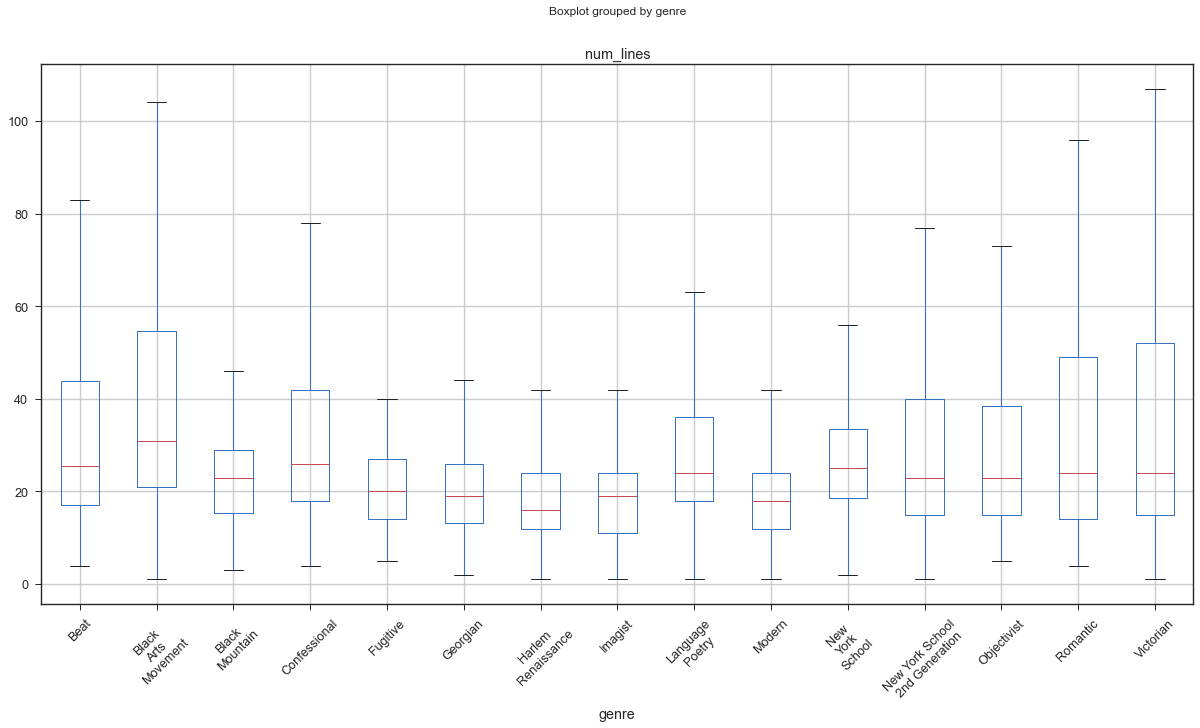

In [396]:
df_trim.boxplot('num_lines', 'genre', showfliers=False, figsize=(20,10))
plt.xticks(ticks=range(1, len(genre_list_pretty)+1), labels=genre_list_pretty, rotation=45);

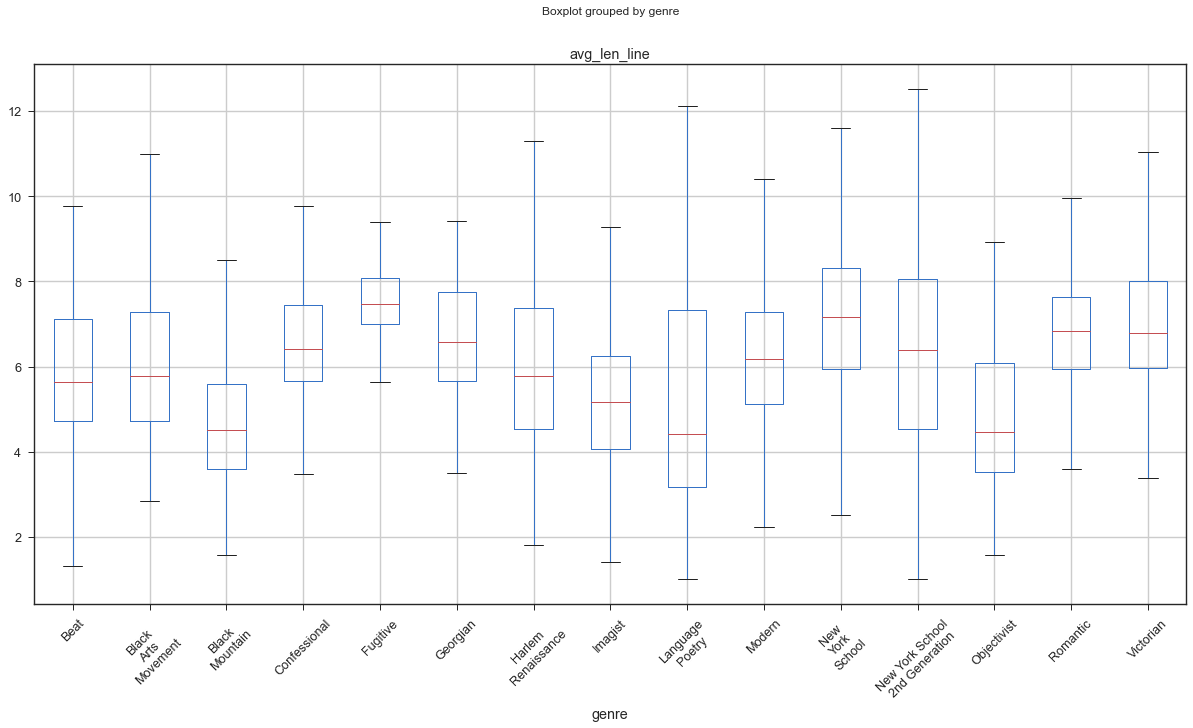

In [397]:
df_trim.boxplot('avg_len_line', 'genre', showfliers=False, figsize=(20,10))
plt.xticks(ticks=range(1, len(genre_list_pretty)+1), labels=genre_list_pretty, rotation=45);